<a href="https://colab.research.google.com/github/Thewaiii/waiijegg/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

## ตรวจสอบข้อมูล

In [3]:
# ถ้ายังไม่มีให้ติดตั้งก่อน
# pip install pandas numpy scikit-learn xgboost matplotlib seaborn openpyxl

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Machien Lerning/CLIK_pr_purchase_request_no_ Jan-July2024 by APP.xlsx'
df_full =  df_details = pd.read_excel(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# 3. จัดการข้อมูลพื้นฐาน
# แปลงคอลัมน์วันที่ให้เป็น Datetime Object ซึ่งสำคัญมาก!
df_full['date'] = pd.to_datetime(df_full['purchase_request_created_time'])

print("\nข้อมูลชนิดต่างๆ:")
df_full.info()
print("\nเช็คค่าว่าง:")
df_full.isnull().sum()


ข้อมูลชนิดต่างๆ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18321 entries, 0 to 18320
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   purchase_request_no               18321 non-null  object        
 1   ac_parts_no                       18258 non-null  object        
 2   ac_part_description               18321 non-null  object        
 3   quantity                          18321 non-null  int64         
 4   purchase_request_detail_po_no     18196 non-null  object        
 5   purchase_order_partner            18196 non-null  object        
 6   purchase_request_detail_part_obj  18321 non-null  object        
 7   purchase_request_amount           18321 non-null  int64         
 8   branch_code                       18321 non-null  int64         
 9   purchase_request_process          18321 non-null  object        
 10  purchase_request_payment_typ

,0
purchase_request_no,0
ac_parts_no,63
ac_part_description,0
quantity,0
purchase_request_detail_po_no,125
purchase_order_partner,125
purchase_request_detail_part_obj,0
purchase_request_amount,0
branch_code,0
purchase_request_process,0


In [7]:
# ตรวจสอบข้อมูลเบื้องต้น
print("ข้อมูลเบื้องต้น:")
df_full.head()

ข้อมูลเบื้องต้น:


,purchase_request_no,ac_parts_no,ac_part_description,quantity,purchase_request_detail_po_no,purchase_order_partner,purchase_request_detail_part_obj,purchase_request_amount,branch_code,purchase_request_process,purchase_request_payment_type,purchase_request_status,purchase_request_reject_comment,purchase_request_approve_by,purchase_request_budget,purchase_request_created_by,purchase_request_created_time,date
0,004-PR2401-0001,SPLT37-215/70R15,Dunlop SPLT37 215/70R15,4,C04-POP2401-0001,บริษัท ดันลอป ไทร์ (ไทยแลนด์) จำกัด,deposit,4,4,nav_receive_all_product,Credit,1,NaN,ATC00225,InBudget,CLK00202,2024-01-01 11:59:53,2024-01-01 11:59:53
1,015-PR2401-0003,582783,Goodyear EFFICIENTGRIP PERFORMANCE SUV 225/60R...,4,C15-POP2401-0002,บริษัท กู๊ดเยียร์ (ประเทศไทย) จำกัด (มหาชน),deposit,4,15,nav_receive_all_product,Credit,1,NaN,ATC00225,InBudget,CLK00071,2024-01-03 09:04:13,2024-01-03 09:04:13
2,002-PR2401-0002,EC300+-185/60R15,Dunlop EC300+ 185/60R15,8,C02-POP2401-0001,บริษัท ดันลอป ไทร์ (ไทยแลนด์) จำกัด,stock,12,2,nav_receive_all_product,Credit,1,NaN,ATC00225,InBudget,CLK00018,2024-01-02 11:44:33,2024-01-02 11:44:33
3,002-PR2401-0002,LM705-185/55R16,Dunlop LM705 185/55R16,4,C02-POP2401-0001,บริษัท ดันลอป ไทร์ (ไทยแลนด์) จำกัด,stock,12,2,nav_receive_all_product,Credit,1,NaN,ATC00225,InBudget,CLK00018,2024-01-02 11:44:33,2024-01-02 11:44:33
4,015-PR2401-0008,594780,Goodyear ASSURANCE MAXGUARD 215/45R17 91W,4,C15-POP2401-0003,บริษัท กู๊ดเยียร์ (ประเทศไทย) จำกัด (มหาชน),deposit,4,15,nav_receive_all_product,Credit,1,NaN,ATC00225,InBudget,CLK00071,2024-01-03 15:37:41,2024-01-03 15:37:41


In [8]:
null_col = ['ac_parts_no',
            'purchase_request_detail_po_no',
            'purchase_order_partner', 'purchase_request_reject_comment']

In [9]:
df_full['purchase_request_reject_comment'].unique()

array([nan, 'แนะนำให้ ทบทวนการสั่งซื้อใหม่ ช่วงสะดวกโทรปรึกษาได้ครับ',
       'ของเข้าช่วงมี.ค-เม.ย. 67 นะคะ', 'รอยางปี 24',
       'ยอดขั้นต่่ำในการสั่ง 1500 บาท เนื้องจากมีการส่งสินค้ามาให้ที่สาขาแล้ว หลังบ้านจึงให้ทำเอกสารนี้อีกครั้งเผื้อรับสินค้า',
       'สั่งเฉพาะรายการที่ 5',
       'แก้ไขรายการ Goodyear ASSURANCE MAXGUARD 195/60R15 88V เนื่องจากยางปี 23',
       'สินค้าหมดครับ\nมีแต่ตัว LM705',
       'ระงัการสั่งชั่วคราว อยู่ระหว่างเปลี่ยนแปลงผลิตภัณฑ์ใหม่ครับ',
       'สั่งตามจำนวนแนะนำสั่งนะคะ',
       'ยกเลิกรายการ กระบอกฉีดน้ำฟ็อกกี้ 700ml  \nY078649 กาพ่นสี HI-TOP รุ่น DO-10 \n0001660 : ฟองน้ำล้างรถ Waxy ไมโครเทค \nแอลกอฮอล์ล้างมือ ชนิดน้ำ  \nคลิปดำ 25 มม \t\nไม้คนกาแฟ',
       'ขั้นต่ำ 180 ลิตรนะคะ', 'แก้ไข ยกเลิก9900204 ใช้พาส9900226 แทน\n',
       'แก้ไขสั่งเฉพาะ 3397016594 จำนวน 6 ชิ้น',
       'รบกวนเปลี่ยนพาสเป็น 1111769 นะคะ', 'เพิ่มรายการของแถม',
       'ยกเลิกเนื่องจากสาขาแจ้งว่ามีสินค้าเหลืออยู่', 'PRซ้ำ สั่งแล้วค่ะ',
       'แก้ไขสั่งใบปัดน้ำฝน BOSCH แทน',
    

In [10]:
df_full[null_col]

,ac_parts_no,purchase_request_detail_po_no,purchase_order_partner,purchase_request_reject_comment
0,SPLT37-215/70R15,C04-POP2401-0001,บริษัท ดันลอป ไทร์ (ไทยแลนด์) จำกัด,NaN
1,582783,C15-POP2401-0002,บริษัท กู๊ดเยียร์ (ประเทศไทย) จำกัด (มหาชน),NaN
2,EC300+-185/60R15,C02-POP2401-0001,บริษัท ดันลอป ไทร์ (ไทยแลนด์) จำกัด,NaN
3,LM705-185/55R16,C02-POP2401-0001,บริษัท ดันลอป ไทร์ (ไทยแลนด์) จำกัด,NaN
4,594780,C15-POP2401-0003,บริษัท กู๊ดเยียร์ (ประเทศไทย) จำกัด (มหาชน),NaN
...,...,...,...,...
18316,-,C08-POO2408-0003,ห้างหุ้นส่วนจำกัด เอส ดับบลิว แอนด์ ซันส์ ดิจิตอล,NaN
18317,EXP-00112,C13-POO2408-0001,บริษัท ลีเรคโก (ประเทศไทย) จำกัด,NaN
18318,-,C02-POO2408-0002,บริษัท เอ.เอส.เค.ทูลส์ จำกัด,NaN
18319,KTC AVSA-064,C08-POO2408-0006,บริษัท เอ.เอส.เค.ทูลส์ จำกัด,NaN


## data preparation

In [11]:
# กำหนดฟังก์ชันทำความสะอาด
def clean_ac_parts_no(value):
    if pd.isna(value):
        return np.nan
    str_val = str(value).strip()

    if str_val in ['-', '=', '_', ';', ',','.','า','ๅ']:
        return np.nan
    elif '612100010' in str_val or str_val.strip() == ' ุๅ/ๅจจจๅจ':
        return '612100010'
    elif str_val.lstrip('่้๊๋็์ฯฺ').startswith('H'):
        # ลบอักขระพิเศษภาษาไทยที่มักอยู่หน้ารหัส เช่น ็, ้, ๋, ฯ, ุ ฯลฯ
        return str_val.lstrip('่้๊๋็์ฯฺ')
    else:
        return str_val

# นำฟังก์ชันไปใช้กับคอลัมน์
df_full['ac_parts_no'] = df_full['ac_parts_no'].apply(clean_ac_parts_no)

# ลบแถวที่ยังเป็น NaN หลังทำความสะอาด
df_full = df_full.dropna(subset=['ac_parts_no'])

In [12]:
df_full['ac_parts_no'].fillna('Unknown', inplace=True)
df_full['purchase_request_detail_po_no'].fillna('Unknown', inplace=True)
df_full['purchase_order_partner'].fillna('Unknown', inplace=True)
df_full['purchase_request_approve_by'].fillna('No_Approver', inplace=True)
# 1. สร้าง Feature ใหม่ชื่อ 'has_comment' (1 คือมีคอมเมนต์, 0 คือไม่มี)
df_full['has_comment'] = df_full['purchase_request_reject_comment'].notna().astype(int)
# 2. แทนที่ค่า null ในคอลัมน์เดิมด้วย 'No_Comment'
df_full['purchase_request_reject_comment'].fillna('No_Comment', inplace=True)

/tmp/ipython-input-12-783303193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_full['ac_parts_no'].fillna('Unknown', inplace=True)
/tmp/ipython-input-12-783303193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['ac_parts_no'].fillna('Unknown', inplace=True)
/tmp/ipython-input-12-783303193.py:2: FutureWarning: A value is try

In [13]:
print("\nเช็คค่าว่าง:")
df_full.isnull().sum()


เช็คค่าว่าง:


,0
purchase_request_no,0
ac_parts_no,0
ac_part_description,0
quantity,0
purchase_request_detail_po_no,0
purchase_order_partner,0
purchase_request_detail_part_obj,0
purchase_request_amount,0
branch_code,0
purchase_request_process,0


In [14]:
df_full.head()

,purchase_request_no,ac_parts_no,ac_part_description,quantity,purchase_request_detail_po_no,purchase_order_partner,purchase_request_detail_part_obj,purchase_request_amount,branch_code,purchase_request_process,purchase_request_payment_type,purchase_request_status,purchase_request_reject_comment,purchase_request_approve_by,purchase_request_budget,purchase_request_created_by,purchase_request_created_time,date,has_comment
0,004-PR2401-0001,SPLT37-215/70R15,Dunlop SPLT37 215/70R15,4,C04-POP2401-0001,บริษัท ดันลอป ไทร์ (ไทยแลนด์) จำกัด,deposit,4,4,nav_receive_all_product,Credit,1,No_Comment,ATC00225,InBudget,CLK00202,2024-01-01 11:59:53,2024-01-01 11:59:53,0
1,015-PR2401-0003,582783,Goodyear EFFICIENTGRIP PERFORMANCE SUV 225/60R...,4,C15-POP2401-0002,บริษัท กู๊ดเยียร์ (ประเทศไทย) จำกัด (มหาชน),deposit,4,15,nav_receive_all_product,Credit,1,No_Comment,ATC00225,InBudget,CLK00071,2024-01-03 09:04:13,2024-01-03 09:04:13,0
2,002-PR2401-0002,EC300+-185/60R15,Dunlop EC300+ 185/60R15,8,C02-POP2401-0001,บริษัท ดันลอป ไทร์ (ไทยแลนด์) จำกัด,stock,12,2,nav_receive_all_product,Credit,1,No_Comment,ATC00225,InBudget,CLK00018,2024-01-02 11:44:33,2024-01-02 11:44:33,0
3,002-PR2401-0002,LM705-185/55R16,Dunlop LM705 185/55R16,4,C02-POP2401-0001,บริษัท ดันลอป ไทร์ (ไทยแลนด์) จำกัด,stock,12,2,nav_receive_all_product,Credit,1,No_Comment,ATC00225,InBudget,CLK00018,2024-01-02 11:44:33,2024-01-02 11:44:33,0
4,015-PR2401-0008,594780,Goodyear ASSURANCE MAXGUARD 215/45R17 91W,4,C15-POP2401-0003,บริษัท กู๊ดเยียร์ (ประเทศไทย) จำกัด (มหาชน),deposit,4,15,nav_receive_all_product,Credit,1,No_Comment,ATC00225,InBudget,CLK00071,2024-01-03 15:37:41,2024-01-03 15:37:41,0


In [15]:
df_full_copy = df_full.copy()

# Feature Engineering

## 1. Time-based Features (Feature ด้านเวลา)
- year: ปี (เช่น 2025)
- month: เดือน (เช่น 7)
- week_of_year: สัปดาห์ที่เท่าไหร่ของปี (เช่น 27)
- day_of_week: วันในสัปดาห์ (เช่น 5, ถ้าวันจันทร์คือ 0)

## 2. Lag Features (Feature ย้อนหลัง)
- lag_1_week: ยอดขายของ สัปดาห์ที่แล้ว
- lag_2_weeks: ยอดขายของ 2 สัปดาห์ที่แล้ว
- lag_4_weeks: ยอดขายของ 4 สัปดาห์ที่แล้ว (เทียบเท่ากับประมาณเดือนที่แล้ว)

## 3. Rolling Features (Feature ค่าเฉลี่ยเคลื่อนที่)
- rolling_mean_4_weeks: ค่าเฉลี่ย ยอดขายในช่วง 4 สัปดาห์ที่ผ่านมา
- rolling_std_4_weeks: ค่าเบี่ยงเบนมาตรฐาน (ความผันผวน) ของยอดขายในช่วง 4 สัปดาห์ที่ผ่านมา

In [16]:
# สมมติว่า df_full คือ DataFrame เริ่มต้นที่โหลดและทำความสะอาดเบื้องต้นแล้ว

# ===========================================================
# ส่วนที่ 1: การเตรียมข้อมูลหมวดหมู่ (ทำกับ df_full)
# ===========================================================
print("กำลังเตรียม Feature จากข้อมูลหมวดหมู่...")

# --- 1.1 เตรียมคอลัมน์ Partner ---
df_full['purchase_order_partner'] = df_full['purchase_order_partner'].str.strip()
top_partners = df_full['purchase_order_partner'].value_counts().nlargest(20).index
df_full['partner_cleaned'] = df_full['purchase_order_partner'].where(df_full['purchase_order_partner'].isin(top_partners), 'Other')

# --- 1.2 เตรียมคอลัมน์ Objective ---
obj_mapping = {
    'stock': 'Stock', 'deposit': 'Deposit', 'claim': 'Claim',
    'ลูกค้ามัดจำ': 'Deposit', 'ลูกค้า GRAB': 'Grab_Customer',
    'ลูกค้าแก๊ป': 'Grab_Customer', 'ลูกค้าเเกร๊ปครับ': 'Grab_Customer',
    'เครื่องมือช่าง': 'Tools', 'อุปกรณ์ช่าง': 'Tools',
    'supplyOffice': 'Office_Supply', 'office': 'Office_Supply',
    'ของแถม': 'Freebie', 'ของเเถม': 'Freebie'
}
def standardize_obj(value):
    value_lower = str(value).lower()
    for key, standardized_value in obj_mapping.items():
        if key in value_lower:
            return standardized_value
    return 'Other'
df_full['request_obj_cleaned'] = df_full['purchase_request_detail_part_obj'].apply(standardize_obj)

# --- 1.3 เตรียมคอลัมน์ Budget ---
df_full['is_in_budget'] = df_full['purchase_request_budget'].apply(lambda x: 1 if x == 'InBudget' else 0)


# ===========================================================
# ส่วนที่ 2: การสรุปข้อมูลเป็น Time Series
# ===========================================================
print("กำลังสรุปข้อมูลเป็น Time Series รายสัปดาห์...")

df_timeseries = df_full.groupby([
    'branch_code',
    'ac_parts_no',
    pd.Grouper(key='date', freq='W-MON')
]).agg(
    total_quantity=('quantity', 'sum'),
    partner=('partner_cleaned', 'first'),
    request_obj=('request_obj_cleaned', 'first'),
    in_budget=('is_in_budget', 'first')
).reset_index()


# ===========================================================
# ส่วนที่ 3: การสร้าง Index ที่สมบูรณ์ และ One-Hot Encoding
# ===========================================================
print("กำลังสร้าง Index ที่สมบูรณ์และแปลงข้อมูลหมวดหมู่...")

# --- 3.1 สร้าง Index ---
all_branches = df_full['branch_code'].unique()
all_parts = df_full['ac_parts_no'].unique()
date_range = pd.date_range(start=df_timeseries['date'].min(), end=df_timeseries['date'].max(), freq='W-MON')
full_index = pd.MultiIndex.from_product([all_branches, all_parts, date_range], names=['branch_code', 'ac_parts_no', 'date'])
df_complete = pd.DataFrame(index=full_index).reset_index()

# --- 3.2 รวมตารางและเติมค่าว่าง ---
df_final_timeseries = pd.merge(df_complete, df_timeseries, on=['branch_code', 'ac_parts_no', 'date'], how='left')
df_final_timeseries['total_quantity'] = df_final_timeseries['total_quantity'].fillna(0)
df_final_timeseries['partner'].fillna('No_Activity', inplace=True)
df_final_timeseries['request_obj'].fillna('No_Activity', inplace=True)
df_final_timeseries['in_budget'].fillna(0, inplace=True)

# --- 3.3 ทำ One-Hot Encoding ---
df_featured = pd.get_dummies(df_final_timeseries, columns=['partner', 'request_obj'], prefix=['supplier', 'req_obj'])


# ===========================================================
# ส่วนที่ 4: การสร้าง Feature ด้านเวลา, Lag, และ Rolling
# ===========================================================
print("กำลังสร้าง Lag และ Rolling features...")

df = df_featured.copy()
df = df.set_index('date')

# --- 4.1 Time-based Features ---
df['year'] = df.index.year
df['month'] = df.index.month
df['week_of_year'] = df.index.isocalendar().week.astype(int)
df['day_of_week'] = df.index.dayofweek

# --- 4.2 Lag Features ---
df['lag_1_week'] = df.groupby(['branch_code', 'ac_parts_no'])['total_quantity'].shift(1)
df['lag_2_weeks'] = df.groupby(['branch_code', 'ac_parts_no'])['total_quantity'].shift(2)
df['lag_4_weeks'] = df.groupby(['branch_code', 'ac_parts_no'])['total_quantity'].shift(4)

# --- 4.3 Rolling Features ---
df['rolling_mean_4_weeks'] = df.groupby(['branch_code', 'ac_parts_no'])['total_quantity'].shift(1).rolling(window=4).mean()
df['rolling_std_4_weeks'] = df.groupby(['branch_code', 'ac_parts_no'])['total_quantity'].shift(1).rolling(window=4).std()

# --- 4.4 จัดการค่าว่างสุดท้าย ---
df.dropna(inplace=True)

# ===========================================================
# สิ้นสุดกระบวนการเตรียมข้อมูล
# ===========================================================
print("\n✅ กระบวนการเตรียมข้อมูลเสร็จสมบูรณ์!")
print(f"ขนาดของข้อมูลที่พร้อมสำหรับเทรนโมเดล: {df.shape}")

กำลังเตรียม Feature จากข้อมูลหมวดหมู่...
กำลังสรุปข้อมูลเป็น Time Series รายสัปดาห์...
กำลังสร้าง Index ที่สมบูรณ์และแปลงข้อมูลหมวดหมู่...


/tmp/ipython-input-16-1824503945.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['purchase_order_partner'] = df_full['purchase_order_partner'].str.strip()
/tmp/ipython-input-16-1824503945.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['partner_cleaned'] = df_full['purchase_order_partner'].where(df_full['purchase_order_partner'].isin(top_partners), 'Other')
/tmp/ipython-input-16-1824503945.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

กำลังสร้าง Lag และ Rolling features...

✅ กระบวนการเตรียมข้อมูลเสร็จสมบูรณ์!
ขนาดของข้อมูลที่พร้อมสำหรับเทรนโมเดล: (602280, 44)


In [17]:
df

,branch_code,ac_parts_no,total_quantity,in_budget,supplier_No_Activity,supplier_Other,supplier_บริษัท กู๊ดเยียร์ (ประเทศไทย) จำกัด (มหาชน),supplier_บริษัท คาร์แลค (ไทย-เยอรมัน) จำกัด,supplier_บริษัท ชัวร์ ฟิลเตอร์ (ประเทศไทย) จำกัด,supplier_บริษัท ซีพีเอส ออโตโมทีฟ จำกัด,...,req_obj_Tools,year,month,week_of_year,day_of_week,lag_1_week,lag_2_weeks,lag_4_weeks,rolling_mean_4_weeks,rolling_std_4_weeks
date,,,,,,,,,,,,,,,,,,,,,
2024-01-29,4,SPLT37-215/70R15,12.0,1.0,False,False,False,False,False,False,...,False,2024,1,5,0,0.0,0.0,4.0,1.0,2.0
2024-02-05,4,SPLT37-215/70R15,0.0,0.0,True,False,False,False,False,False,...,False,2024,2,6,0,12.0,0.0,0.0,3.0,6.0
2024-02-12,4,SPLT37-215/70R15,0.0,0.0,True,False,False,False,False,False,...,False,2024,2,7,0,0.0,12.0,0.0,3.0,6.0
2024-02-19,4,SPLT37-215/70R15,0.0,0.0,True,False,False,False,False,False,...,False,2024,2,8,0,0.0,0.0,0.0,3.0,6.0
2024-02-26,4,SPLT37-215/70R15,0.0,0.0,True,False,False,False,False,False,...,False,2024,2,9,0,0.0,0.0,12.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-08,6,KTC AVSA-064,0.0,0.0,True,False,False,False,False,False,...,False,2024,7,28,0,0.0,0.0,0.0,0.0,0.0
2024-07-15,6,KTC AVSA-064,0.0,0.0,True,False,False,False,False,False,...,False,2024,7,29,0,0.0,0.0,0.0,0.0,0.0
2024-07-22,6,KTC AVSA-064,0.0,0.0,True,False,False,False,False,False,...,False,2024,7,30,0,0.0,0.0,0.0,0.0,0.0


# Data Modeling
## Decision Tree

ขนาดข้อมูลทั้งหมดที่จะใช้ใน GridSearchCV: (602280, 41)

กำลังเริ่ม GridSearchCV สำหรับ Decision Tree...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

--- ผลลัพธ์ Decision Tree GridSearchCV ---
Hyperparameters ที่ดีที่สุด: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 40}
Mean Absolute Error (MAE) ที่ดีที่สุดจากการ Cross-Validation: 0.3533

กำลังสร้างโมเดลสุดท้าย...


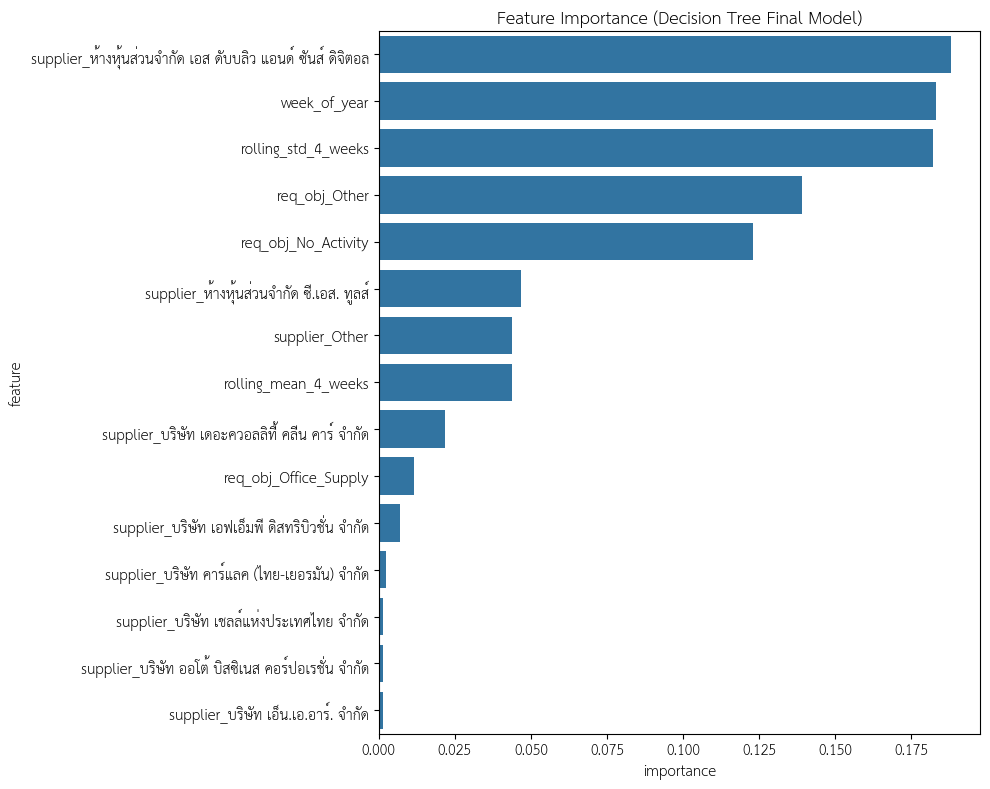


เปรียบเทียบ MAE จาก Cross-Validation:
  - Decision Tree (Tuned, from CV): 0.3533
  - XGBoost (Tuned, from CV): 0.3616

สรุป: โมเดล Decision Tree ให้ผลลัพธ์ที่ดีกว่าหรือเทียบเท่า


In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# df คือ DataFrame ที่ผ่านการทำ Feature Engineering ทั้งหมดแล้ว
df.reset_index(inplace=True)

# 1. เตรียมข้อมูลสำหรับ GridSearchCV
# เราจะใช้ข้อมูลทั้งหมดในการทำ Cross-Validation
X = df.drop(columns=['date', 'total_quantity', 'branch_code', 'ac_parts_no']).reset_index(drop=True)
y = df['total_quantity'].reset_index(drop=True)

print(f"ขนาดข้อมูลทั้งหมดที่จะใช้ใน GridSearchCV: {X.shape}")

# 2. กำหนดรูปแบบการทำ Cross-Validation สำหรับ Time Series
tscv = TimeSeriesSplit(n_splits=5)

# 3. กำหนดช่วงของ Hyperparameters ที่ต้องการค้นหาสำหรับ Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 20, 40],
    'min_samples_leaf': [5, 10, 20]
}

# 4. สร้างโมเดล Decision Tree ตั้งต้น
dt_model = DecisionTreeRegressor(random_state=42)

# 5. ตั้งค่า GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    scoring='neg_mean_absolute_error',
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

print("\nกำลังเริ่ม GridSearchCV สำหรับ Decision Tree...")
# 6. เริ่มต้นการค้นหา
grid_search_dt.fit(X, y)

# 7. แสดงผลลัพธ์
print("\n--- ผลลัพธ์ Decision Tree GridSearchCV ---")
print(f"Hyperparameters ที่ดีที่สุด: {grid_search_dt.best_params_}")
best_mae_dt_cv = -grid_search_dt.best_score_
print(f"Mean Absolute Error (MAE) ที่ดีที่สุดจากการ Cross-Validation: {best_mae_dt_cv:.4f}")


# --- ส่วนนี้: การสร้างโมเดลสุดท้าย และแสดง Feature Importance ---

# 8. สร้างโมเดลสุดท้ายด้วย Parameters ที่ดีที่สุด
print("\nกำลังสร้างโมเดลสุดท้าย...")
final_dt_model = DecisionTreeRegressor(**grid_search_dt.best_params_, random_state=42)

# 9. เทรนโมเดลสุดท้ายด้วยข้อมูลทั้งหมด
final_dt_model.fit(X, y) # เทรนด้วยข้อมูลทั้งหมดเพื่อโมเดลที่สมบูรณ์ที่สุด
# ติดตั้ง font สำหรับไทย
try:
    !wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
    mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
    mpl.rc('font', family='TH Sarabun New')
except:
    print("ไม่สามารถติดตั้ง font ไทยได้")

# 10. แสดง Feature Importance
# --- แก้ไขชื่อตัวแปร ---
feature_importances_dt = pd.DataFrame({
    'feature': X.columns,
    'importance': final_dt_model.feature_importances_
}).sort_values('importance', ascending=False).head(15) # แสดง 15 อันดับแรก

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_dt)
plt.title('Feature Importance (Decision Tree Final Model)')
plt.tight_layout()
plt.show()


# 11. เปรียบเทียบกับผลลัพธ์ของ XGBoost (ใช้ค่าจาก CV ทั้งคู่)
best_mae_xgb = 0.3616 # ค่าจากผลลัพธ์ก่อนหน้า
print(f"\nเปรียบเทียบ MAE จาก Cross-Validation:")
print(f"  - Decision Tree (Tuned, from CV): {best_mae_dt_cv:.4f}")
print(f"  - XGBoost (Tuned, from CV): {best_mae_xgb:.4f}")

if best_mae_dt_cv > best_mae_xgb:
    print("\nสรุป: โมเดล XGBoost ที่ผ่านการปรับจูนแล้วให้ผลลัพธ์ที่แม่นยำกว่าอย่างชัดเจน")
else:
    print("\nสรุป: โมเดล Decision Tree ให้ผลลัพธ์ที่ดีกว่าหรือเทียบเท่า")


In [19]:
import pandas as pd
import numpy as np

# --- การเตรียมข้อมูล ---
# df คือ DataFrame ที่มี Feature ครบถ้วนจากขั้นตอนที่แล้ว
# final_dt_model คือโมเดล Decision Tree ที่เราเทรนเสร็จแล้ว
# X คือ DataFrame ของ Features ที่ใช้ตอนเทรน

# แปลง Index 'date' กลับมาเป็นคอลัมน์ปกติก่อน
df_for_predict = df.reset_index()

# 1. เตรียมข้อมูลล่าสุดของแต่ละสินค้า x สาขา เพื่อเป็นจุดเริ่มต้น
last_known_data = df_for_predict.loc[df_for_predict.groupby(['branch_code', 'ac_parts_no'])['date'].idxmax()].copy()

# 2. ขอข้อมูลสต็อกปัจจุบัน (สำคัญมาก!)
# ในที่นี้เราจะจำลองขึ้นมา
last_known_data['current_stock'] = np.random.randint(0, 50, size=len(last_known_data))

# --- การทำนายสำหรับสัปดาห์หน้า (1 สัปดาห์) ---

# 3. สร้าง Feature สำหรับสัปดาห์อนาคต
future_date = last_known_data['date'].max() + pd.DateOffset(weeks=1)
df_predict_dt = last_known_data.copy()

# อัปเดต Time-based features สำหรับสัปดาห์หน้า
df_predict_dt['date'] = future_date
df_predict_dt['year'] = df_predict_dt['date'].dt.year
df_predict_dt['month'] = df_predict_dt['date'].dt.month
df_predict_dt['week_of_year'] = df_predict_dt['date'].dt.isocalendar().week.astype(int)
df_predict_dt['day_of_week'] = df_predict_dt['date'].dt.dayofweek

# 4. ทำนายผลด้วยโมเดล Decision Tree
features_for_model = X.columns.tolist()
X_future_dt = df_predict_dt[features_for_model]

# ใช้ final_dt_model ในการทำนาย
predictions_dt = final_dt_model.predict(X_future_dt)

# ทำให้ค่าที่ทำนายไม่ติดลบและปัดเศษ
predictions_dt[predictions_dt < 0] = 0
df_predict_dt['predicted_demand_next_week'] = np.round(predictions_dt).astype(int)

# --- สร้างไฟล์ผลลัพธ์สุดท้าย ---

# 5. คำนวณยอดที่แนะนำให้สั่ง
df_predict_dt['recommended_order_quantity'] = df_predict_dt['predicted_demand_next_week'] - df_predict_dt['current_stock']
df_predict_dt['recommended_order_quantity'] = df_predict_dt['recommended_order_quantity'].clip(lower=0)

# 6. เลือกคอลัมน์ที่ต้องการและบันทึกเป็นไฟล์
final_columns = [
    'branch_code',
    'ac_parts_no',
    'predicted_demand_next_week',
    'current_stock',
    'recommended_order_quantity'
]
df_final_recommendation_dt = df_predict_dt[final_columns]

# บันทึกเป็นไฟล์ใหม่
# df_final_recommendation_dt.to_csv('recommendations_next_week_dt.csv', index=False, encoding='utf-8-sig')

print("\nสร้างไฟล์ 'recommendations_next_week_dt.csv' สำหรับ Decision Tree เรียบร้อยแล้ว")
print("ตัวอย่างผลลัพธ์:")
print(df_final_recommendation_dt.head())



สร้างไฟล์ 'recommendations_next_week_dt.csv' สำหรับ Decision Tree เรียบร้อยแล้ว
ตัวอย่างผลลัพธ์:
        branch_code    ac_parts_no  predicted_demand_next_week  current_stock  \
265495            1  000000Y074912                           0              9   
265439            1           0001                           0              2   
249311            1        0001660                           0             11   
277059            1        0002589                           0             17   
260427            1        0002968                           0             32   

        recommended_order_quantity  
265495                           0  
265439                           0  
249311                           0  
277059                           0  
260427                           0  


In [20]:
df_final_recommendation_dt[df_final_recommendation_dt['recommended_order_quantity']>0]

,branch_code,ac_parts_no,predicted_demand_next_week,current_stock,recommended_order_quantity
249115,1,PSR0LG8700,8,1,7
80387,2,EC300+-185/60R15,12,2,10
338771,3,594772,5,3,2
325471,3,594774,8,5,3
361339,3,A21-2999SEG019,50,35,15
401463,5,A21-2999SEG01,50,30,20
486107,9,594786,8,5,3
521835,9,ตัวทดสอบน้ำมันคอมฯ,50,6,44
200675,10,ตัวทดสอบน้ำมันคอมฯแอ,50,0,50
407763,11,594784,8,7,1



กำลังสร้างภาพโครงสร้างของ Decision Tree 


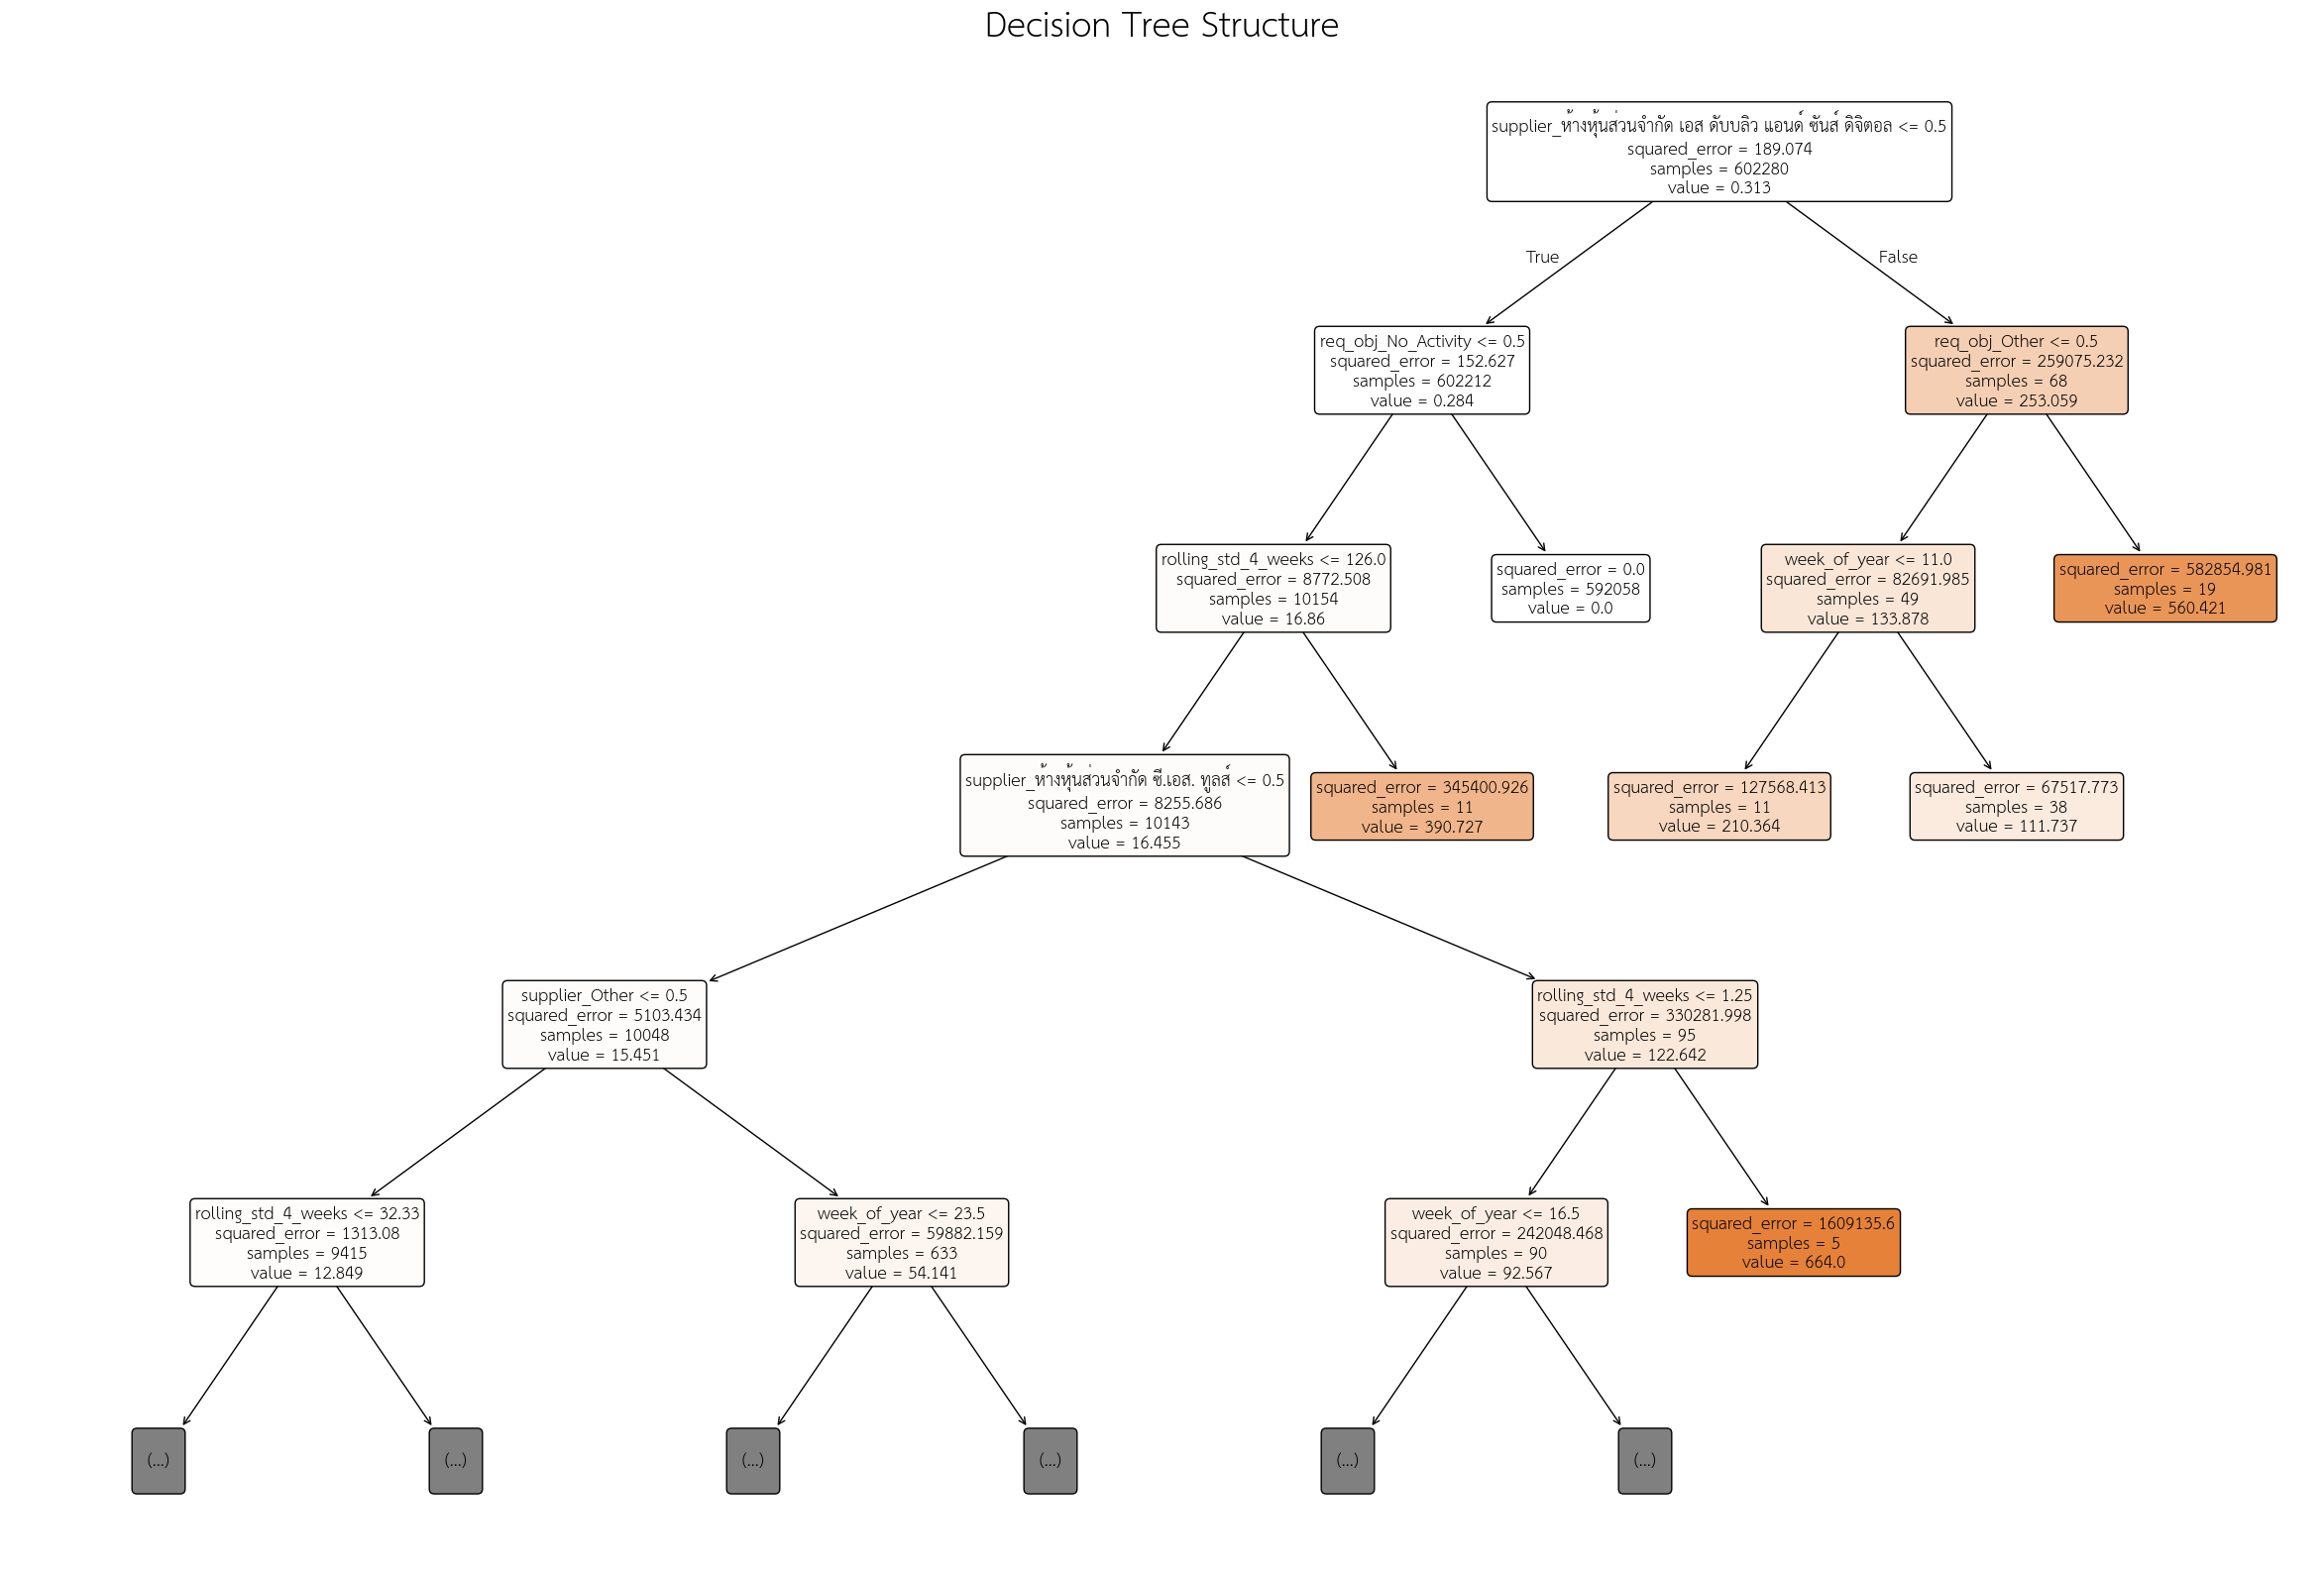

In [22]:
# --- ขั้นตอนที่ 4: ลองพล็อต Decision Tree ใหม่อีกครั้ง ---
# final_dt_model คือโมเดล Decision Tree ที่เราเทรนเสร็จแล้ว
# X คือ DataFrame ของ Features ที่ใช้ตอนเทรน

print("\nกำลังสร้างภาพโครงสร้างของ Decision Tree ")

plt.figure(figsize=(30, 20)) # ขยายขนาดภาพให้ใหญ่และชัดเจนขึ้น

plot_tree(
    final_dt_model,
    feature_names=X.columns.tolist(),
    filled=True,
    rounded=True,
    max_depth=5, # แสดงแค่ 5 ชั้นแรกเพื่อให้เห็นภาพรวม
    fontsize=12
)

plt.title("Decision Tree Structure", fontsize=24)
plt.show()
